<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf 

data = np.load('../quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

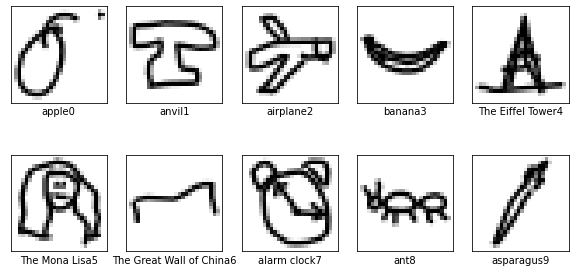

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name+str(y[start]))
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [5]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


baseline = Sequential([
    Dense(units=128, input_dim=784, activation='relu', name='Input_Layer'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),    
])

baseline.compile(loss='sparse_categorical_crossentropy',
             # optimizer='rmsprop', # default optimizer
              metrics=['accuracy'])

print(baseline.summary())

baseline.fit(X, y,
          epochs=30,
          batch_size=32, # This is the default batch_size
          validation_split=0.2,
          callbacks=[tensorboard_callback])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
2500/2500 [==============================] - 4s 1ms/step - loss: 3.6788 - accuracy: 0.4950 - val_loss: 1.3426 - val_accuracy: 0.5249
Epoch 2/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3613 - accuracy: 0.59

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [6]:
baseline.history.history

{'loss': [1.8799777030944824,
  1.38994562625885,
  1.4319102764129639,
  1.5149343013763428,
  1.5778051614761353,
  1.652535319328308,
  1.7266111373901367,
  1.7667714357376099,
  1.8952308893203735,
  1.845234990119934,
  1.9119561910629272,
  2.088256359100342,
  2.142484664916992,
  2.227842092514038,
  2.306638240814209,
  2.42059326171875,
  2.2902283668518066,
  2.26623797416687,
  2.5640358924865723,
  2.3632285594940186,
  2.220505952835083,
  2.29488468170166,
  2.23079252243042,
  2.2408387660980225,
  2.690443277359009,
  2.3391075134277344,
  2.9278082847595215,
  2.2854819297790527,
  2.561830997467041,
  2.645524263381958],
 'accuracy': [0.5459625124931335,
  0.588100016117096,
  0.5754374861717224,
  0.5602124929428101,
  0.5465750098228455,
  0.5158874988555908,
  0.5114250183105469,
  0.49160000681877136,
  0.4754374921321869,
  0.47154998779296875,
  0.43006250262260437,
  0.4097124934196472,
  0.41478750109672546,
  0.3721874952316284,
  0.38858750462532043,
  0.3

(30, 4)

,accuracy,loss,val_accuracy,val_loss
0,0.545963,1.879978,0.52485,1.342559
1,0.588100,1.389946,0.60520,1.395604
2,0.575437,1.431910,0.55915,1.385446
3,0.560212,1.514934,0.53505,1.422738
4,0.546575,1.577805,0.53935,1.524207


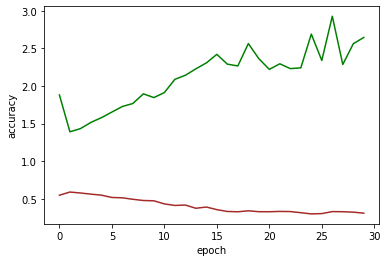

In [7]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history.history)
display(df.shape, df.head())
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='accuracy', data=df, color='brown')
ax = sns.lineplot(x='epoch', y='loss', data=df, color='green');

From the loss/accuracy vs epoch chart above it's clear that training should have been stopped after epoch 1 as the loss increases and accuracy decreases from that point onwards.

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [8]:
from tensorflow.keras.optimizers import Adam 

adam = Adam()

adam_model = Sequential([
    Dense(units=128, input_dim=784, activation='relu', name='Input_Layer'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),    
])

adam_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

print(adam_model.summary())

adam_model.fit(X, y,
          epochs=30,
          batch_size=32, # This is the default batch_size
          validation_split=0.2,
          callbacks=[tensorboard_callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
2500/2500 [==============================] - 3s 1ms/step - loss: 3.5790 - accuracy: 0.5988 - val_loss: 0.7276 - val_accuracy: 0.7794
Epoch 2/30
2500/2500 [==============================] - 2s 980us/step - loss: 0.6667 - accuracy: 

(30, 4)

,accuracy,loss,val_accuracy,val_loss
0,0.687262,1.493878,0.77940,0.727576
1,0.801175,0.654837,0.81145,0.628469
2,0.825950,0.575884,0.82615,0.584318
3,0.841513,0.527512,0.82275,0.588126
4,0.853125,0.487959,0.84375,0.534099


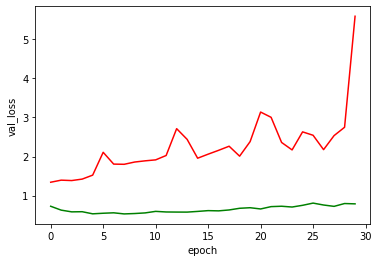

In [9]:
df_adam = pd.DataFrame.from_records(adam_model.history.history)
display(df_adam.shape, df_adam.head())
df_adam['epoch'] = [i for i in range(df_adam.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df, color='red')
ax = sns.lineplot(x='epoch', y='val_loss', data=df_adam, color='green');

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

Loss Functions - Since we have 10(i.e. 2 or more) label classes and the labels are provided as integers(0-9) and not one hot encoded, the best loss function would be SparseCategoricalCrossEntropy(https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class).

Metrics - A metric(https://keras.io/api/metrics/) is a function used to judge the performance of the model but (unlike loss functions) not used during the training of the model - after each training epoch, the metric is used to evaluate the performance of the trained model.

Optimizers - Stochastic Gradient Descent(https://julsimon.medium.com/tumbling-down-the-sgd-rabbit-hole-part-1-740fa402f0d7) has many deficiencies that adaptive sgd optimizers like Adam attempt to solve. In fact, from https://keras.io/api/optimizers/adam/, we know that the adam optimizer is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
However, according to “The Marginal Value of Adaptive Gradient Methods in Machine Learning” (Ashia Wilson et al., 2017)(https://julsimon.medium.com/tumbling-down-the-sgd-rabbit-hole-part-2-bed3be4761d3), a "well-tuned SGD with learning rate decay at specific epochs ends up outperforming all adaptive optimizers" - the devil, of course, lies in the details and crafting a "well tuned SGD" optimizer takes a lot of effort.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)